In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## Objective: Predict the age of the abalones based on the physical measurements from the dataset.


In [93]:
df = pd.read_csv(r'C:\Users\anjal\OneDrive\Desktop\Git\Anjali-NTU-Assignments\module 3\Module-3 Coaching\abalone\abalone.data', header=None)

df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
              'viscera_weight', 'shell_weight', 'rings']
df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [94]:
df['age'] = df['rings'] + 1.5
df

sex  length  diameter  height  whole_weight  shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings   age  
0             0.1010        0.1500     15  16.5  
1             0.0485        0.0700      7   8.5  
2             0.1415        0.2100      9  10.5  
3             0.1140        0.1550     10  11.5  
4             0.0395        0.0550      7   8.5  
...              ...           ...    ...   ...  
4172          0.2390        0.2490     11  12.5  
4173          0.2145        0.2605     10  11.5  
4174          0.2875        0.3080      9  10.5  
4175          0.2610        0.2960     10  11.5  
4176          0.3765        0.4950     12  13.5  

[4177 rows x 10 columns]

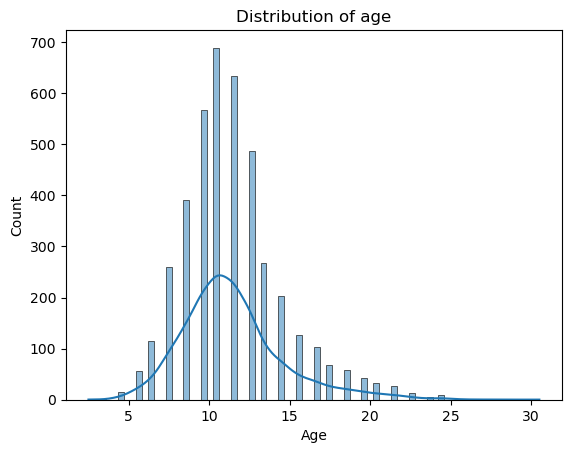

In [14]:
# Distribution of age
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.show()


## Convert categorical data into numerical

In [95]:
import pandas as pd

# One-hot encode the 'Sex' column
df_encoded = pd.get_dummies(df, columns=['sex'], prefix='sex')
# Convert boolean columns to integers (1 and 0)
df_encoded[['sex_M', 'sex_F', 'sex_I']] = df_encoded[['sex_M', 'sex_F', 'sex_I']].astype(int)

df_encoded.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings   age  sex_F  sex_I  sex_M  
0         0.150     15  16.5      0      0      1  
1         0.070      7   8.5      0      0      1  
2         0.210      9  10.5      1      0      0  
3         0.155     10  11.5      0      0      1  
4         0.055      7   8.5      0      1      0

In [13]:
correlation_matrix = df_encoded.corr()
correlation_matrix['age']

length            0.556720
diameter          0.574660
height            0.557467
whole_weight      0.540390
shucked_weight    0.420884
viscera_weight    0.503819
shell_weight      0.627574
rings             1.000000
age               1.000000
sex_F             0.250279
sex_I            -0.436063
sex_M             0.181831
Name: age, dtype: float64

#### Shell Weight has the strongest positive correlation with age followed by diameter, length and height.
.

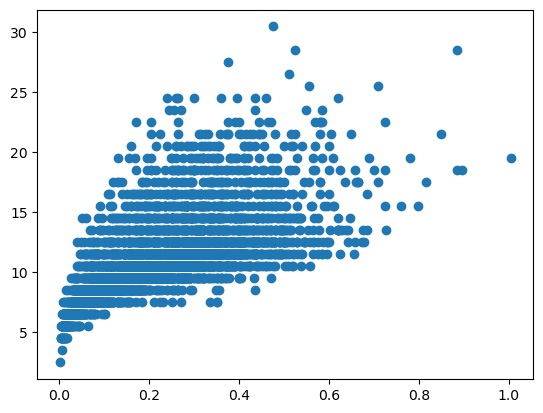

In [15]:
import matplotlib.pyplot as plt

# Create the scatter plot
x = df['shell_weight']
y = df['age']
plt.scatter(x, y)

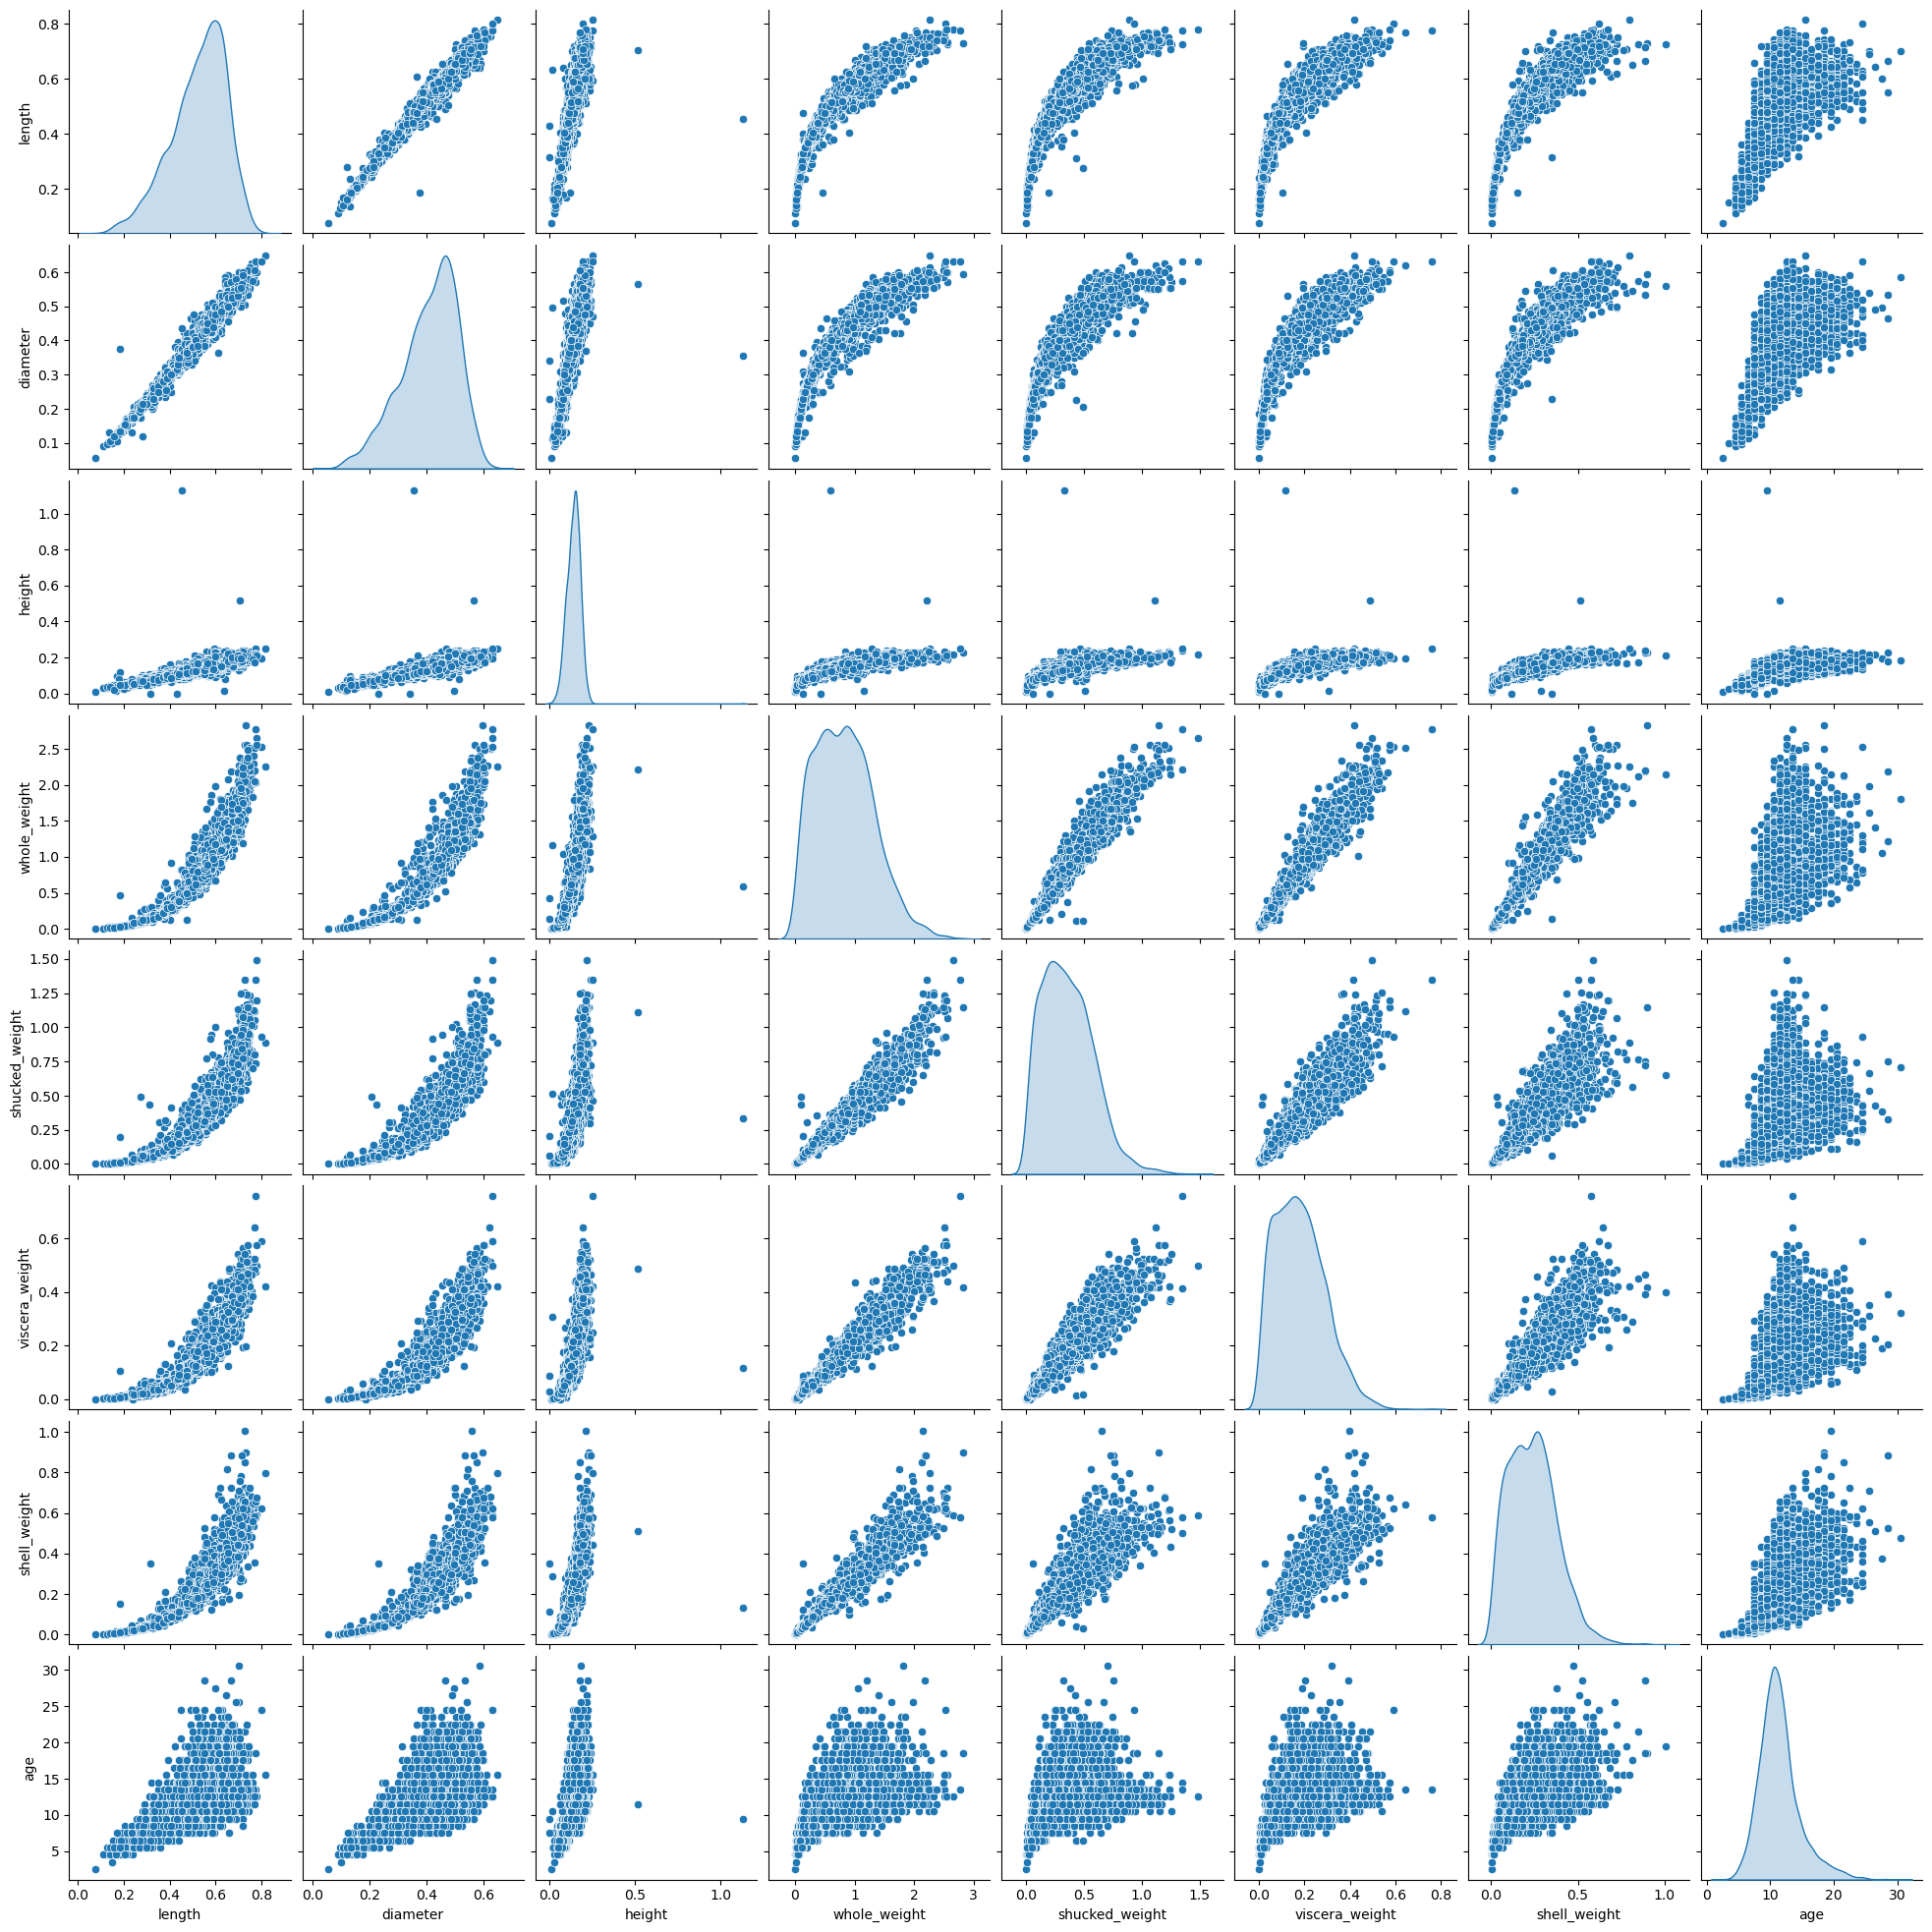

In [61]:
import seaborn as sns

selected_features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'age']  # Include 'age' for correlation
sns.pairplot(df[selected_features], diag_kind='kde', height=2.5)

plt.show()


#### Prepare features and target

In [17]:
from sklearn.model_selection import train_test_split

# features (independent variables) 
X = df_encoded.drop(columns=['age', 'rings'])  # Drop target-related columns
# target (dependent variable)
y = df_encoded['age']  # Predicting Age

#### Split the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build and train the KNN Regression model

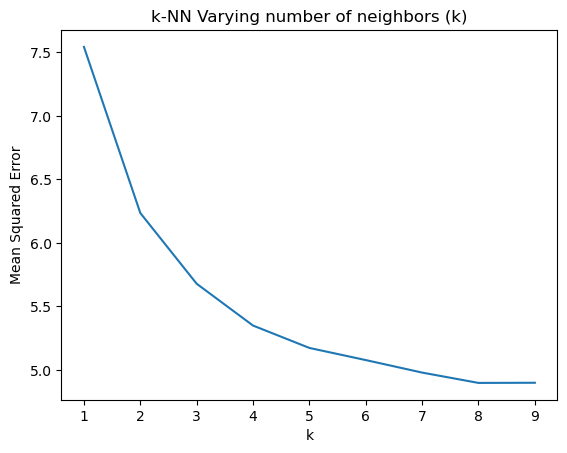

In [19]:
errors = []
for k in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.plot(range(1, 10), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.show()

In [20]:
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

#### Make prediction

In [21]:
y_pred = knn_reg.predict(X_test)

#### Evaluate the model

In [22]:
# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.2745208233991954

In [23]:
# R² Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5236374981094113

## Build and train the Linear Regression model

In [57]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scalar

# Initialize the model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)


LinearRegression()

#### Make predictions

In [58]:
# Use the model to make predictions on the test set.
y_pred = linear_model.predict(X_test)

#### Evaluate the model

In [59]:
# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.2376055391377463

In [60]:
# R² Score
r2 = r2_score(y_test, y_pred)
r2

0.5389746671340974

#### On average, the model's predictions deviate from the actual age by about 2.23 years.<br> The model explains about 54% of the variance in age.

## Statsmodel



In [62]:
import statsmodels.api as sm

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     429.2
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:42:28   Log-Likelihood:                -7345.9
No. Observations:                3341   AIC:                         1.471e+04
Df Residuals:                    3331   BIC:                         1.477e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
length            -0.3065      2.008     -0.153      0.879      -4.243       3.630
diameter          11.2596      2.463      4.571      0.000       6.430      16.089
height             8.0994      1.593      5.084      0.000       4.976      11.223
whole_weight       9.3738      0.786     11.924      0.000       7.832      10.915
shucked_weight   -20.1697      0.897    -22.476      0.000     -21.929     -18.410
viscera_weight   -10.6732      1.412     -7.562      0.000     -13.441      -7.906
shell_weight       8.3390      1.216      6.858      0.000       5.955      10.723
sex_F              5.5195      0.327     16.877      0.000       4.878       6.161
sex_I              4.6894      0.299     15.680      0.000       4.103       5.276
sex_M              5.5946      0.320     17.482      0.000       4.967       6.222
==============================================================================
Omnibus:                      724.271   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1872.820
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       5.833   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Use the model to make predictions on the test set.
y_pred = model.predict(X_test)

In [68]:
# Evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared.

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Root Mean Squared Error: 2.2376055391377467
R^2 Score: 0.5389746671340974


#### Optimizing a model 

In [89]:
# drop sex
from sklearn.model_selection import train_test_split
df_encoded['shell_weight_length'] = df_encoded['shell_weight']*df_encoded['length']
# features (independent variables) 
X = df_encoded.drop(columns=['age', 'rings', 'sex_F', 'sex_I', 'sex_M', 'shell_weight', 'length'])  # Drop target-related columns
# target (dependent variable)
y = df_encoded['age']  # Predicting Age		

In [90]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Use the model to make predictions on the test set.
y_pred = linear_model.predict(X_test)

In [92]:
# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# R² Score
r2 = r2_score(y_test, y_pred)

rmse, r2

(2.2766133680019918, 0.5227605940148374)

## Polynomial Regression